# Transporte difusivo Bidimensional
### Juan S. Hincapié - Carlos Duque-Daza


## Esquemas espaciales para derivadas de primer orden
Las más conocidas son:

Forward Finite Difference:

$$
    \frac{d\phi}{dx} \approx \frac{\phi_{i+1}-\phi_{i}}{\Delta x} +  O(\Delta x)
$$


Backward Finite Difference:
$$
    \frac{d\phi}{dx} \approx \frac{\phi_{i}-\phi_{i-1}}{\Delta x} +  O(\Delta x) 
$$


Central Finite Difference:
$$
    \frac{d\phi}{dx} \approx \frac{\phi_{i+1}-\phi_{i-1}}{2\Delta x} +  O(\Delta x)^2 
$$


## Esquemas espaciales para derivadas de segundo orden

Central Finite Difference:
$$
 \frac{d^2\phi}{dx^2} \approx \frac{\phi_{i+1}-2\phi_{i} + \phi_{i-1}}{\Delta x^2} +  O(\Delta x)^2 
$$


## Esquemas temporales

<div align='justify'> Los esquemas anteriores sirven para aproximar derivadas espaciales. ¿Qué hacemos con las derivadas temporales? Debemos seguir usando Euler en sus diferentes versiones:</div>

Tenindo la siguiente EDP:
$$
\frac{d\phi}{dt} = f (t,x,\phi)
$$

Esquema explícito (Euler hacia adelante):
$$
    \frac{\phi^{n+1}_{i}-\phi^{n}_{i}}{\Delta t} = f_i^{n} (t,x,\phi)
$$

Esquema implícito (Euler hacia atrás):
$$
    \frac{\phi^{n+1}_{i}-\phi^{n}_{i}}{\Delta t} = f_i^{n+1} (t,x,\phi)
$$



## Problema 

<div align='justify'> Un grupo de ingenieros electrónicos se encuentran diseñando un sistema de electrónica de alta potencia para transmitir energía eléctrica generada por paneles solares hacia la red de distribución de energía eléctrica de la ciduad. Los cálculos de circuitos, conversores y filtros marchan bien. Sin embargo, hay un detalle diseño del que no están seguros: si una de las piezas soportará las concidiones térmicas. La pieza se muestra a continuación.  </div>

<img src=https://raw.githubusercontent.com/juhincapiem/ModMat/refs/heads/main/Diagrams/placaPlana.png alt="Barrra hierro fundido" width="700" />

<div align='justify'> En principio tienen pensando usar cobre puro, con las siguientes propiedades:</div>

* $\rho = 8933 \, kg/m^3$
* $C_p = 385 \, J/kg.K$
* $\kappa = 401 \, W/m.K$
* Punto de fusión $1358 \, K$

<div align='justify'> Las dimensiones son:</div>

* $L = 20 \, cm$
* $H = 20 \, cm$

## Modelo matemático
 
\begin{equation}
 \rho C_p\frac{d T}{d t} = \kappa \left (  \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}  \right)
\end{equation}

Sujeto a las siguientes condiciones de frontera:

$$
T(t,x = 0, y) = T(t,x, y = 0) = 300 \, ^\circ C
$$


$$
T(t,x = L, y) = T(t,x, y = H) = 20 \, ^\circ C
$$


Y condición inicial:


$$
T(t=0, x, y) = 20 \, ^\circ C
$$

Excepto en:
$$
T(t=0, x = 0, y) = 300 \, ^\circ C
$$

$$
T(t=0, x, y = 0) = 300 \, ^\circ C
$$


Gráficamente:



<img src=https://raw.githubusercontent.com/juhincapiem/ModMat/refs/heads/main/Diagrams/placaPlanaFrontera.png alt="Barrra hierro fundido" width="750" />

## Modelo numérico

<div align='justify'> Para la solución de este modelo, se va a emplear método implícito para discretizar el tiempo, y un esquema de diferencias centradas para el espacio. Para empezar, se puede emplear pocos nodos:</div>


<img src=https://raw.githubusercontent.com/juhincapiem/ModMat/refs/heads/main/Diagrams/placaPlanaMalla.png alt="Barrra hierro fundido" width="450" />



Para este caso, el sistema de ecuaciones queda la siguiente forma:

$$
\left[\begin{array}{ccccccccc}
T_{0,0} & T_{0,1} & T_{0,2} & T_{1,0} & T_{1,1} & T_{1,2} & T_{2,0} & T_{2,1} & T_{2,2} \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & -F_y & 0 & -F_x & 1+2F_x + 2F_y & -F_x & 0 & -F_y & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{array}\right]
\left[\begin{array}{l}
T_{0,0} \\
T_{0,1} \\
T_{0,2} \\
T_{1,0} \\
T_{1,1} \\
T_{1,2} \\
T_{2,0} \\
T_{2,1} \\
T_{2,2}
\end{array}\right]^{\, n+1}
= \left(\begin{array}{c}
T_{c} \\
T_{c} \\
T_{c} \\
T_{c} \\
T_{1,1}^n \\
T_{f} \\
T_{f} \\
T_{f} \\
T_{f} 
\end{array}\right)
$$


## Calibración

<div align='justify'> Como ya se mencionó, es muy buena idea usar pocos nodos mientras programamos el método. Así podemos visualizar la matriz y verificar que esté dando cosas con sentido. Por lo tanto, se emplea un $\Delta x = \Delta y = 0.3$ y $L = H = 60 \, cm$. Para el tiempo se usa $\Delta t = 0.1$ y $t_f = 0.1$.



In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
# Paso 00: definir propiedades geométricas
H = 20/100 # Altura [m]
L = 20/100 # Largo [m]

# Paso 01: propiedades térmicas del material
rho = 8933 # Densidad [kg/m3]
Cp = 385   # Calor específico [J/kg.K]
k = 401    # Conductividad térmica [W/m.K]
alpha = k/(Cp*rho)

In [ ]:
# Paso 02: definir número de nodos en el eje x
x0 = 0.0; dx = 0.01

# Paso 03: definir número de nodos en el eje y
y0 = 0.0; dy = 0.01


# Paso 04: definir el número de pasos temporales
t0 = 0.0; tf = 10.0; dt = 0.1


# Paso 05: crear matrices donde almacenar la temperatura actual, y la del futuro

# Paso 06: crear matrices donde de posición nodal. Servirá para graficar


In [ ]:
# Paso 07: llenar la matriz TPre con las condiciones iniciales


In [ ]:
# Paso 08: incializar la matriz A y el vector b


In [ ]:
# Paso 09: llenar la matriz A con los


# Llenamos para j = 0, i = 0,1,2,...

# Llenamos para j = NodosY-1, i = 0,1,2,...



# Llenamos para todas las filas internas (las que es están entre la primera y la última)


# Indicamos cuántas cifras para imprimir cualquier variable punto flotante
np.set_printoptions(formatter={'float':"{0:0.4f}".format})


In [ ]:
# Paso 10: resolver en el tiempo. A medida que se avanzan en el tiempo, se debe actualizar el vector b
Tc = 300
Tf = 20

    # Resolvemos el sistema de ecuaciones lineales

    
    # Extraer del vector c la información para llenar la matriz TFut


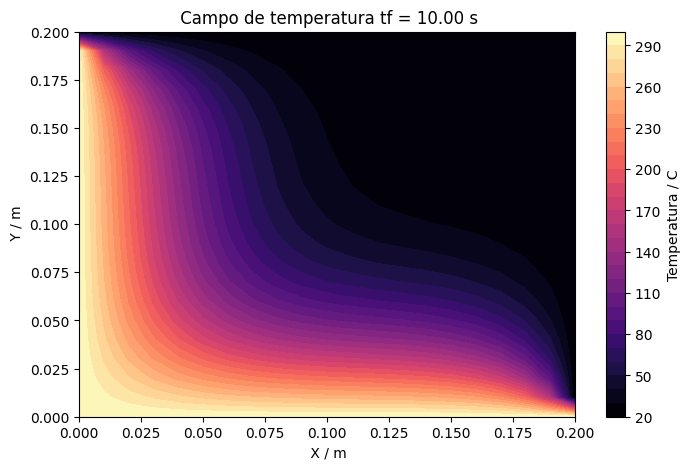

In [ ]:
# Paso 11: hacemos unas buenas obras de arte
